#### What is Linear Regression
Linear regression is a supervised machine learning algorithm used to model the relationship between one dependent variable (target) and one or more independent variables (features).

Simple linear regression: 1 feature → target.
Multiple linear regression: multiple features → target.

The model assumes that the relationship between the features and the target can be approximated by a straight line (linear function)

##### Research Question and Aim
Dataset: 
This chosen dataset contains sales number according to the type of advertisement and the size of the cost. In this dataset we will be using the type of advertisement (TV, Radio and Newspaper) and our dependent variable (sales).

Thus our research question is:

This question is good to test with linear regression as there is an intuitive assumption that there is a linear positive correlation between different forms of advertisment and the amount of sales it generates.


In [ ]:
#PHASE 1: DATA ACQUISITION & UNDERSTANDING
#Phase 1, Step 1: Import Libraries and Load Data

# Data manipulation libraries
import pandas as pd
import numpy as np  

# Visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns  

# Machine learning libraries
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score


# For handling missing values/outliers if needed
from sklearn.impute import SimpleImputer  
from scipy import stats  

df = pd.read_csv('/Users/mariamodubayo/spotify-ml-challenge/spotify-ml-challenge/data/advertising.csv')

In [ ]:
#Phase 1, Step 2: Initial Data Exploration
df.head() # First few rows
df.shape  # Dimensions (rows, columns)
df.info() # Data types & memory usage 
df.describe() # Statistical summary 
df.columns # Column names 
df.nunique() # Unique values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [ ]:
#PHASE 2: EXPLORATORY DATA ANALYSIS (EDA)
#Phase 2, Step 3: Data Quality Assessment
# Checking for missing values
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")

# Checking for duplicates
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"There are {duplicate_count} duplicate rows in the dataset.")

In [ ]:
#Phase 2, step 4 handling missing values and duplicates
# Handling missing values (if any)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        if df[col].dtype in [np.float64, np.int64]:
            imputer = SimpleImputer(strategy='mean')
        else:
            imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])
# Removing duplicates
df = df.drop_duplicates()

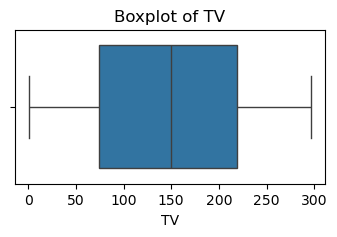

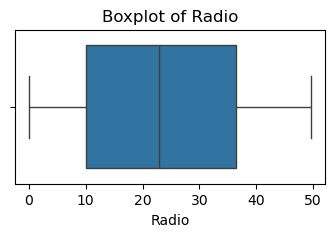

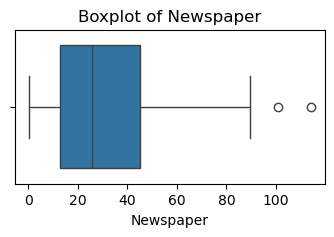

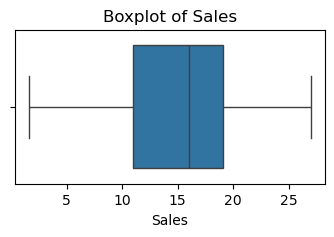

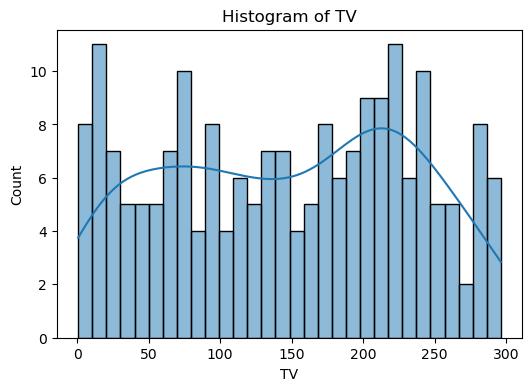

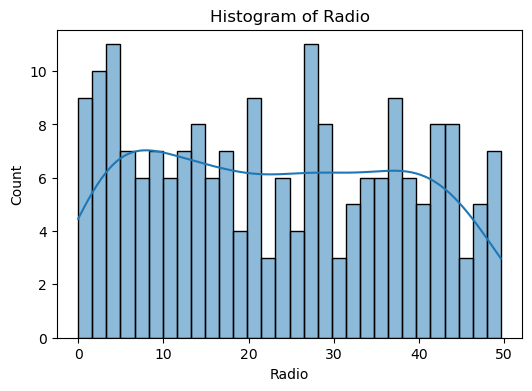

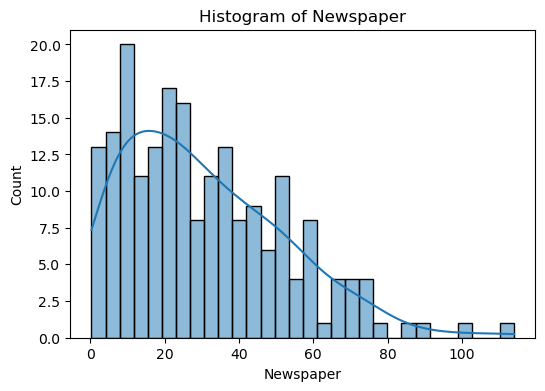

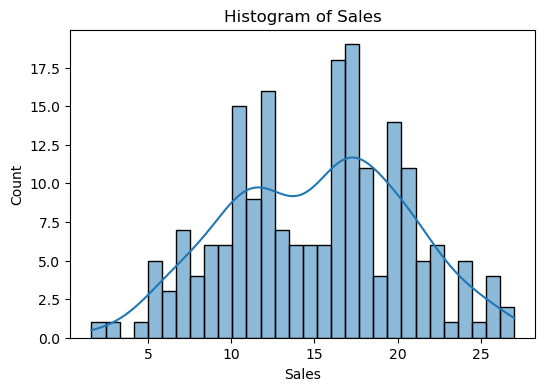

There are 2 outliers in the dataset based on z-score method.
Column 'Newspaper' has 2 outliers based on IQR method.


In [ ]:
#Phase 2, Step 5: Outlier Detection and Treatment
# Visualisting outliers using boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#Outlier detection using histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show() 

#outlier detection using z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).any(axis=1)
if outliers.any():
    print(f"There are {outliers.sum()} outliers in the dataset based on z-score method.")

#Outlier detection using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {outliers.shape[0]} outliers based on IQR method.")


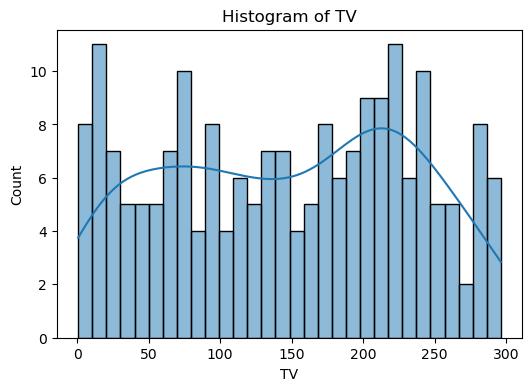

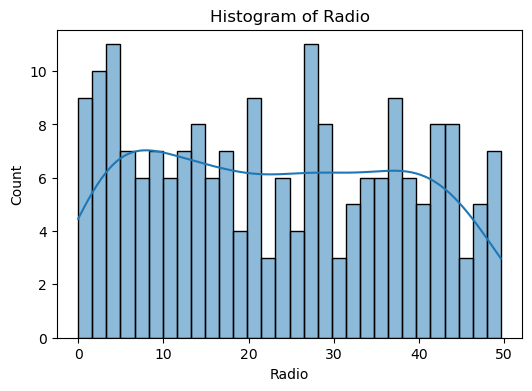

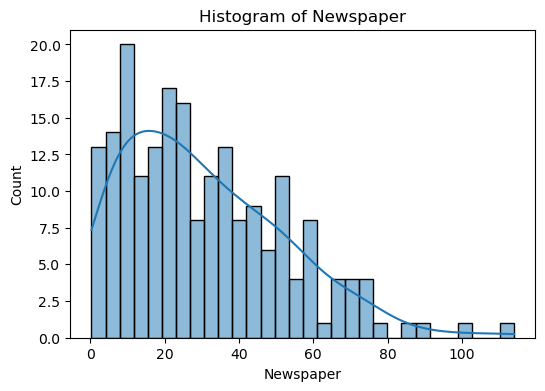

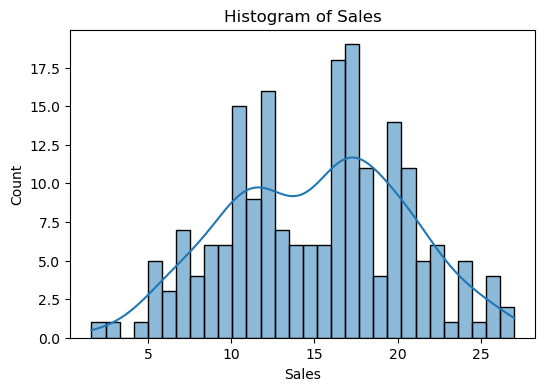

In [ ]:
#Phase 2, Step 7: Distribution Analysis
#Distribution for Numerical Features using Histograms
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()  

#Distribution for Categorical Features using Bar Plots
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()  

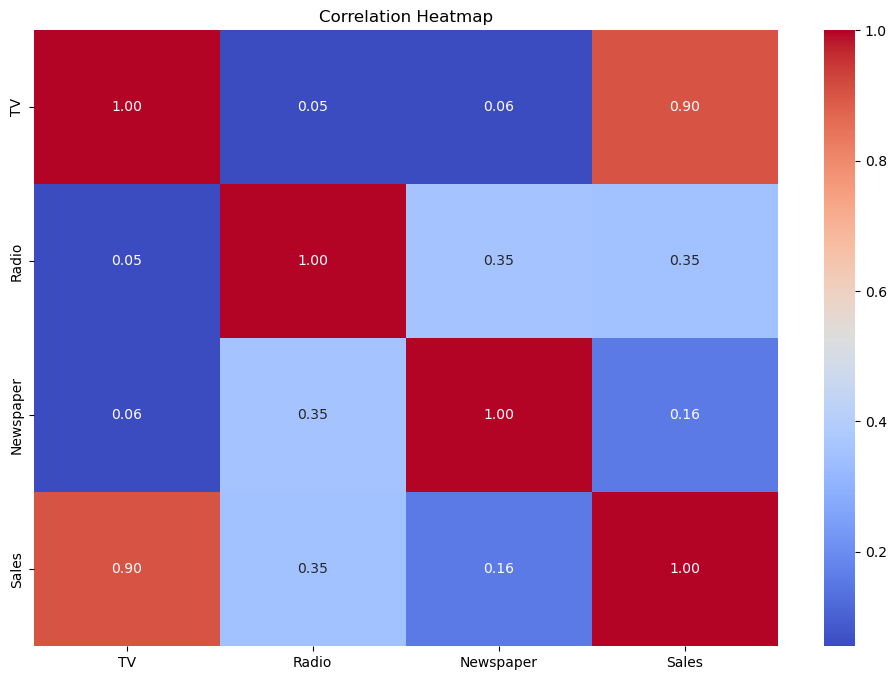

In [ ]:
#PHASE 3: FEATURE ANALYSIS & SELECTION
#Phase 3, Step 8: Feature Correlation Analysis

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


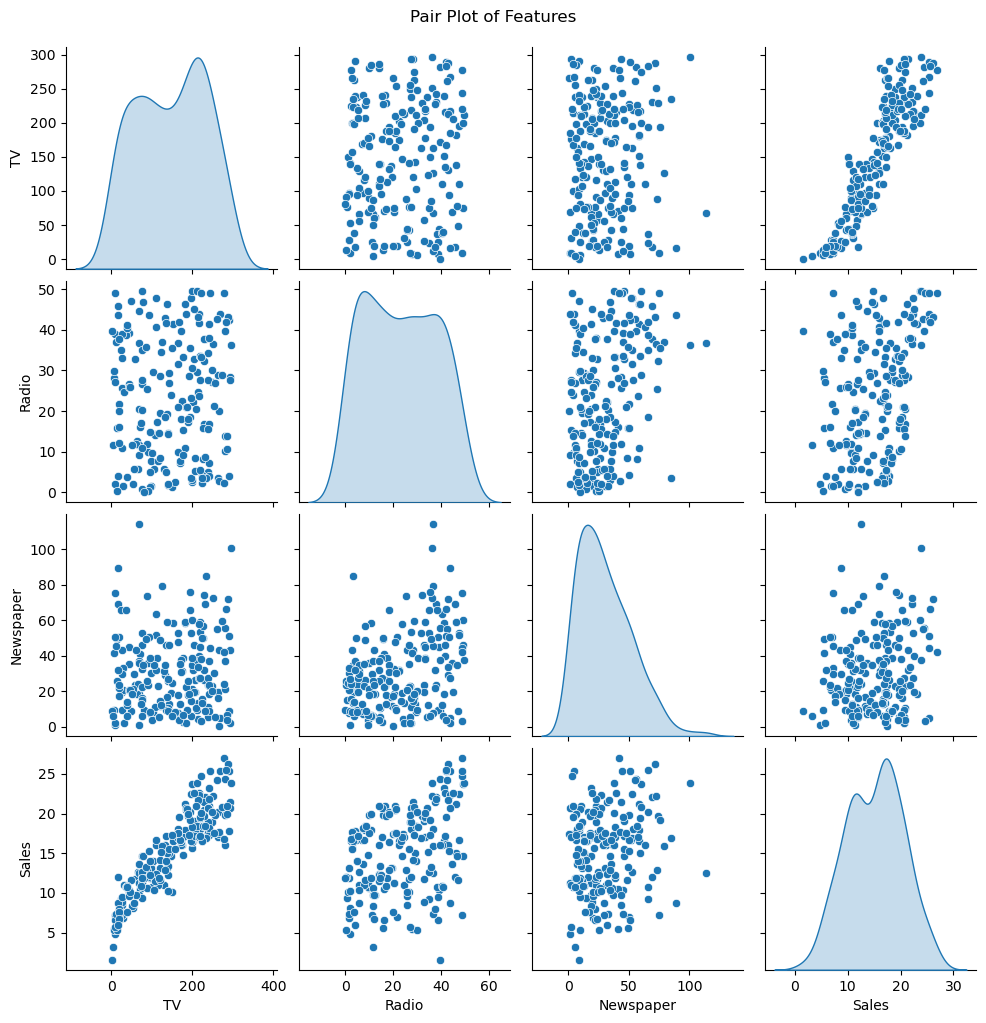

In [ ]:
#Phase 3, Step 9: Feature Relationship with Target Variable

#Pair plots for getting relationships
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [ ]:
#PHASE 4: FEATURE ENGINEERING & MODELING
#PHASE 5, Step 10: Feature Creation
#PHASE 5, Step 11: Feature Transformation
#PHASE 5, Step 12: Encode Categorical Variables 

In [ ]:
#PHASE 5: DATA PREPARATION
#PHASE 5, Step 13: Feature Selection

#Phase 5, Step 14: Train-Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Sales', axis=1)  # Features
y = df['Sales']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Methodology

Before applying our linear regression, we conducted our inital analysis of the dataset. Standard best practice was done such as 

How did you prepare your dataset before applying linear regression? (e.g., checked for missing values, looked at distributions, etc.)

What are the independent variables (features) and dependent variable (target)?

What steps did you take to split the dataset (train/test split)?

How did you fit the linear regression model, and what outputs did you expect to see?

In [ ]:
#PHASE 6: MODEL BUILDING 
#PHASE 6, Step 15: Model Selection and Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#PHASE 6, Step 16: Model Prediction
y_pred = linear_model.predict(X_test)

Mean Absolute Error (MAE): 1.2748262109549346
Mean Squared Error (MSE): 2.9077569102710923
Root Mean Squared Error (RMSE): 1.7052146229349232
R-squared (R2 ): 0.9059011844150826
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


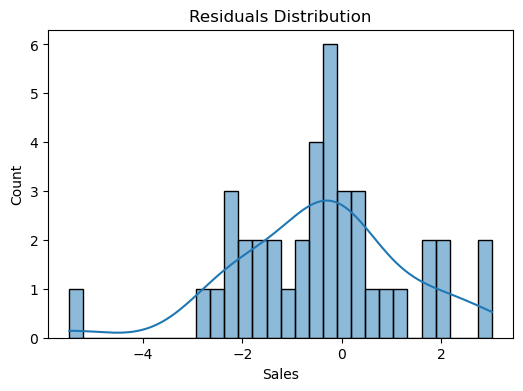

Cross-Validation R2 Scores: [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Mean Cross-Validation R2 Score: 0.8953723525274103


In [ ]:
#PHASE 7: MODEL EVALUATION & INTERPRETATION
#PHASE 7, Step 17: Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

#PHASE 7, Step 18: Model Interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print(coefficients)
#residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.show()

#Phase 7, Step 19: Validation
# Cross-validation 
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {cv_scores.mean()}")        



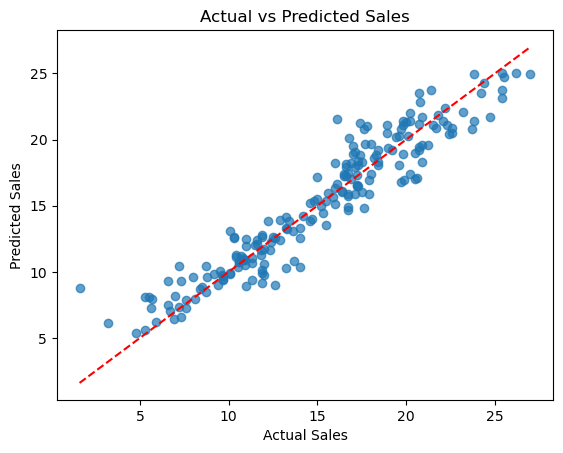

In [ ]:
y_pred = linear_model.predict(X)

plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45° line
plt.show()

In [ ]:
#PHASE 8: MODEL REFINEMENT & DEPLOYMENT

##### Results
What were the coefficients for each feature, and how should they be interpreted? (e.g., for every unit increase in TV spend, how much do sales increase on average?)

Which features seemed most important, and which had very little effect?

What were the error metrics (MAE, MSE, RMSE), and what do they each tell you about your model’s performance?

How well does the R² value show the model’s ability to explain variance in the data?

#### Evaluation 
Do the results make intuitive sense given what you know about advertising and sales?

Was there any feature that didn’t seem to matter much? Why might that be the case?

How could the model be improved (e.g., adding more data, feature engineering, trying polynomial regression)?

What limitations should you be aware of when using linear regression in real-world problems?

#### Conclusion
What was the main takeaway from your analysis?

Did linear regression successfully help you understand the relationship between ad spend and sales?

What did you learn about both the dataset and the method itself?

How would you build on this project next time?